# 🥔 Étude Data Analyst : Le Grand Tournoi des Patates

Cette étude analyse les résultats de **500 000 combats** entre **1 000 patates** générées procéduralement.

## 📊 Sommaire
1. [Chargement des données](#1.-Chargement-des-données)
2. [Analyse du 'Meta' (Top Mutations/Armes)](#2.-Analyse-du-'Meta'-(Top-Mutations/Armes))
3. [Corrélation Statistiques vs Victoire](#3.-Corrélation-Statistiques-vs-Victoire)
4. [L'Anatomie du Champion (Top 1%)](#4.-L'Anatomie-du-Champion-(Top-1%))
5. [Le Triangle des Armes](#5.-Le-Triangle-des-Armes)
6. [Loi des Rendements Décroissants (Nombre de Traits)](#6.-Loi-des-Rendements-Décroissants-(Nombre-de-Traits))
7. [Analyse des Counters (Mutation vs Mutation)](#7.-Analyse-des-Counters-(Mutation-vs-Mutation))

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
print("Bibliothèques chargées !")

Bibliothèques chargées !


## 1. Chargement des données
Nous chargeons les fichiers générés par la simulation.

In [28]:
potatoes_df = pd.read_csv('potatoes.csv')
matches_df = pd.read_csv('matches.csv')

# Nettoyage des traits et armes (split des chaînes)
potatoes_df['trait_list'] = potatoes_df['traits'].fillna('').apply(lambda x: x.split('|') if x else [])
potatoes_df['weapon_list'] = potatoes_df['weapons'].fillna('').apply(lambda x: x.split('|') if x else [])
potatoes_df['num_traits'] = potatoes_df['trait_list'].apply(len)

print(f"Patates : {len(potatoes_df)}")
print(f"Matchs : {len(matches_df)}")
potatoes_df.head()

Patates : 1000
Matchs : 499500


,id,name,force,vitesse,agilite,vitalite,level,traits,weapons,trait_list,weapon_list,num_traits
0,potato_0,Potato #0,13,17,19,20,5,Appel de l'Astico-Roi|Gardien de Racine|Peau d...,Capsule,"[Appel de l'Astico-Roi, Gardien de Racine, Pea...",[Capsule],3
1,potato_1,Potato #1,11,17,17,15,5,Coup Critique|Esprit Saboteur,Cutter|Cure-dent|Fourchette,"[Coup Critique, Esprit Saboteur]","[Cutter, Cure-dent, Fourchette]",2
2,potato_2,Potato #2,7,24,21,15,5,Sprint Final|Essaim de Moucherons|Appel de l'A...,Capsule|Cutter,"[Sprint Final, Essaim de Moucherons, Appel de ...","[Capsule, Cutter]",3
3,potato_3,Potato #3,18,15,14,15,5,Berzerk|Contre-attaque,Cure-dent|Cutter|Fourchette,"[Berzerk, Contre-attaque]","[Cure-dent, Cutter, Fourchette]",2
4,potato_4,Potato #4,11,21,17,18,5,Peau de Cuir,Cutter|Cure-dent|Capsule,[Peau de Cuir],"[Cutter, Cure-dent, Capsule]",1


## 2. Analyse du 'Meta' (Top Mutations/Armes)
Calcul des performances globales.

In [29]:
# Calcul du winrate par patate
wins = matches_df['winner_id'].value_counts().rename('wins')
p1_counts = matches_df['id_p1'].value_counts()
p2_counts = matches_df['id_p2'].value_counts()
total_games = p1_counts.add(p2_counts, fill_value=0).rename('total_games')

stats_df = potatoes_df.set_index('id').join(wins).join(total_games).fillna(0)
stats_df['winrate'] = (stats_df['wins'] / stats_df['total_games'].replace(0, 1)) * 100
stats_df['total_stats'] = stats_df[['force', 'vitesse', 'agilite', 'vitalite']].sum(axis=1)

print("Top 10 des patates les plus fortes :")
display(stats_df.sort_values('winrate', ascending=False).head(10))

Top 10 des patates les plus fortes :


,name,force,vitesse,agilite,vitalite,level,traits,weapons,trait_list,weapon_list,num_traits,wins,total_games,winrate,total_stats
id,,,,,,,,,,,,,,,
potato_881,Potato #881,16,20,11,15,5,Appel de l'Astico-Roi|Esprit Saboteur|Gardien ...,0,"[Appel de l'Astico-Roi, Esprit Saboteur, Gardi...",[],6,968,999.0,96.896897,62
potato_94,Potato #94,20,24,6,14,5,Essaim de Moucherons|Contre-attaque|Peau de Cu...,0,"[Essaim de Moucherons, Contre-attaque, Peau de...",[],5,963,999.0,96.396396,64
potato_567,Potato #567,18,19,7,21,5,Gardien de Racine|Esprit Saboteur|Sprint Final...,Fourchette|Capsule,"[Gardien de Racine, Esprit Saboteur, Sprint Fi...","[Fourchette, Capsule]",4,954,999.0,95.495495,65
potato_14,Potato #14,16,24,13,11,5,Appel de l'Astico-Roi|Gardien de Racine|Sprint...,0,"[Appel de l'Astico-Roi, Gardien de Racine, Spr...",[],5,951,999.0,95.195195,64
potato_952,Potato #952,15,16,13,23,5,Sprint Final|Esprit Saboteur|Coup Critique|Ber...,Capsule|Fourchette,"[Sprint Final, Esprit Saboteur, Coup Critique,...","[Capsule, Fourchette]",4,951,999.0,95.195195,67
potato_103,Potato #103,8,21,8,28,5,Sprint Final|Essaim de Moucherons|Peau de Cuir...,Capsule,"[Sprint Final, Essaim de Moucherons, Peau de C...",[Capsule],5,945,999.0,94.594595,65
potato_782,Potato #782,24,21,5,19,5,Gardien de Racine|Berzerk,Capsule,"[Gardien de Racine, Berzerk]",[Capsule],2,940,999.0,94.094094,69
potato_971,Potato #971,15,25,11,16,5,Berzerk|Contre-attaque|Coup Critique,Cutter|Capsule,"[Berzerk, Contre-attaque, Coup Critique]","[Cutter, Capsule]",3,936,999.0,93.693694,67
potato_448,Potato #448,22,22,13,10,5,Contre-attaque|Sprint Final|Berzerk,Capsule|Fourchette,"[Contre-attaque, Sprint Final, Berzerk]","[Capsule, Fourchette]",3,931,999.0,93.193193,67


## 3. Corrélation Statistiques vs Victoire
Quelle statistique est la plus déterminante ?

AttributeError: Line2D.set() got an unexpected keyword argument 'width'

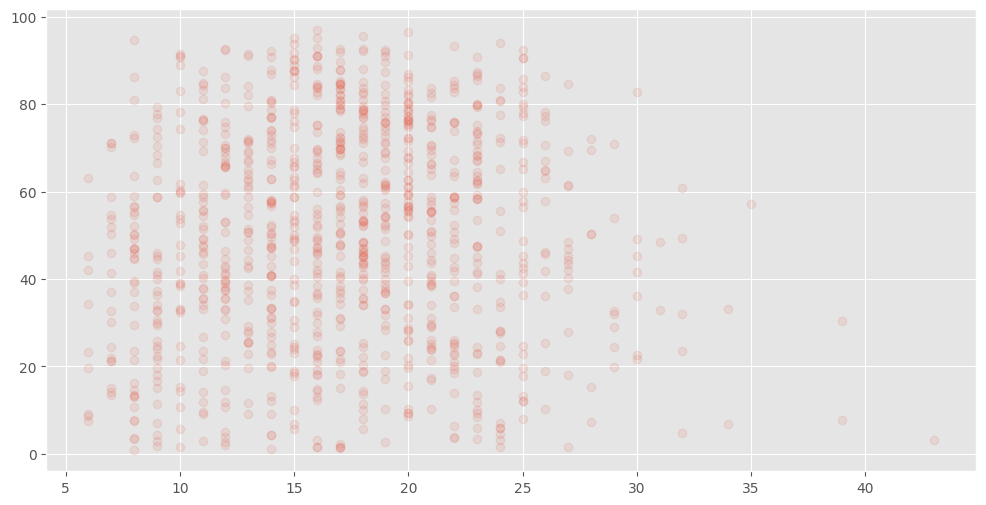

In [33]:
plt.figure(figsize=(12, 6))
for stat in ['force', 'vitesse', 'agilite', 'vitalite']:
    sns.regplot(data=stats_df, x=stat, y='winrate', label=stat.capitalize(), scatter_kws={'alpha':0.1}, line_kws={'width':2})
plt.title("Influence des Statistiques sur le Winrate")
plt.legend()
plt.show()

correlations = stats_df[['force', 'vitesse', 'agilite', 'vitalite', 'winrate']].corr()['winrate'].sort_values(ascending=False)
print("Corrélations avec le winrate :")
print(correlations)

## 4. L'Anatomie du Champion (Top 1%)
Portrait-robot des 10 meilleures patates.

In [31]:
top_1_percent = stats_df.sort_values('winrate', ascending=False).head(10)

print("--- Portrait-Robot du Champion ---")
print(f"Moyenne Force: {top_1_percent['force'].mean():.2f}")
print(f"Moyenne Vitesse: {top_1_percent['vitesse'].mean():.2f}")
print(f"Moyenne Mutations: {top_1_percent['num_traits'].mean():.2f}")

all_top_traits = [trait for sublist in top_1_percent['trait_list'] for trait in sublist]
print("\nTraits les plus fréquents chez les champions :")
print(pd.Series(all_top_traits).value_counts().head(5))

--- Portrait-Robot du Champion ---
Moyenne Force: 17.00
Moyenne Vitesse: 20.80
Moyenne Mutations: 4.10

Traits les plus fréquents chez les champions :
Sprint Final         8
Berzerk              6
Esprit Saboteur      5
Contre-attaque       5
Gardien de Racine    4
Name: count, dtype: int64


## 5. Le Triangle des Armes
Performance des armes les unes contre les autres.

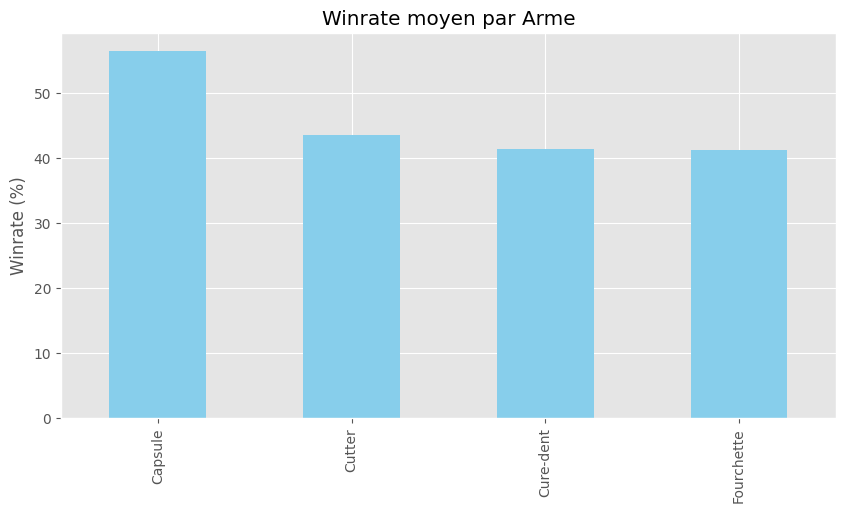

In [32]:
# Expansion des armes pour analyse
weapon_performance = {}
for weapon in stats_df['weapon_list'].explode().unique():
    if pd.isna(weapon): continue
    mask = stats_df['weapons'].str.contains(weapon, na=False)
    weapon_performance[weapon] = stats_df[mask]['winrate'].mean()

wp_series = pd.Series(weapon_performance).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
wp_series.plot(kind='bar', color='skyblue')
plt.title("Winrate moyen par Arme")
plt.ylabel("Winrate (%)")
plt.show()

## 6. Loi des Rendements Décroissants (Nombre de Traits)
Est-ce que plus de mutations garantissent la victoire ?

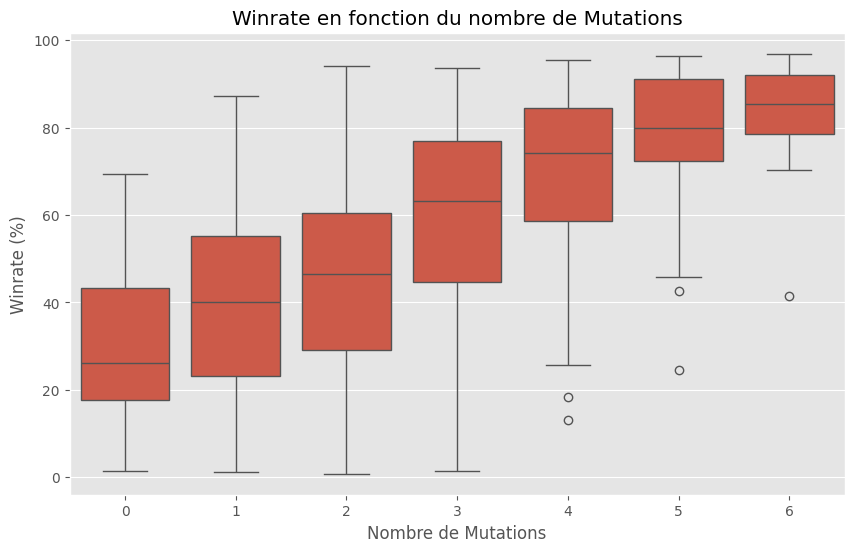

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=stats_df, x='num_traits', y='winrate')
plt.title("Winrate en fonction du nombre de Mutations")
plt.xlabel("Nombre de Mutations")
plt.ylabel("Winrate (%)")
plt.show()

## 7. Analyse des Counters (Mutation vs Mutation)
Quelle mutation bat quoi ?

In [ ]:
# Cette section nécessite un pivot lourd sur les matchs.
# On va simplifier en regardant le winrate global des traits.
trait_performance = {}
for trait in stats_df['trait_list'].explode().unique():
    if pd.isna(trait): continue
    mask = stats_df['traits'].str.contains(trait, na=False)
    trait_performance[trait] = stats_df[mask]['winrate'].mean()

trait_series = pd.Series(trait_performance).sort_values(ascending=False)
print("Taux de victoire moyen par Mutation :")
display(trait_series.head(10))